# HOMEWORK 5: TEXT CLASSIFICATION
In this homework, you will create models to classify texts from TRUE call-center. There are two classification tasks:
1. Action Classification: Identify which action the customer would like to take (e.g. enquire, report, cancle)
2. Object Classification: Identify which object the customer is referring to (e.g. payment, truemoney, internet, roaming) 

In this homework, you are asked to do the following tasks:
1. Data Cleaning
2. Preprocessing data for keras
3. Build and evaluate a model for "action" classification
4. Build and evaluate a model for "object" classification
5. Build and evaluate a multi-task model that does both "action" and "object" classifications in one-go 


Note: we have removed phone numbers from the dataset for privacy purposes. 

## Import Libs

In [64]:
%matplotlib inline
import pandas
import sklearn
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt

## Loading data
First, we load the data from disk into a Dataframe.

A Dataframe is essentially a table, or 2D-array/Matrix with a name for each column.

In [2]:
data_df = pandas.read_csv('clean-phone-data-for-students.csv')

Let's preview the data.

In [3]:
# Show the top 5 rows
display(data_df.head())
# Summarize the data
data_df.describe()

,Sentence Utterance,Action,Object
0,<PHONE_NUMBER_REMOVED> ผมไปจ่ายเงินที่ Counte...,enquire,payment
1,internet ยังความเร็วอยุ่เท่าไหร ครับ,enquire,package
2,ตะกี้ไปชำระค่าบริการไปแล้ว แต่ยังใช้งานไม่ได้...,report,suspend
3,พี่ค่ะยังใช้ internet ไม่ได้เลยค่ะ เป็นเครื่อ...,enquire,internet
4,ฮาโหล คะ พอดีว่าเมื่อวานเปิดซิมทรูมูฟ แต่มันโ...,report,phone_issues


,Sentence Utterance,Action,Object
count,16175,16175,16175
unique,13389,10,33
top,บริการอื่นๆ,enquire,service
freq,97,10377,2525


## Data cleaning

We call the DataFrame.describe() again.
Notice that there are 33 unique labels/classes for object and 10 unique labels for action that the model will try to predict.
But there are unwanted duplications e.g. Idd,idd,lotalty_card,Lotalty_card

Also note that, there are 13389 unqiue sentence utterances from 16175 utterances. You have to clean that too!

## #TODO 1: 
You will have to remove unwanted label duplications as well as duplications in text inputs. 
Also, you will have to trim out unwanted whitespaces from the text inputs. 
This shouldn't be too hard, as you have already seen it in the demo.



In [4]:
display(data_df.describe())
display(data_df.Object.unique())
display(data_df.Action.unique())

,Sentence Utterance,Action,Object
count,16175,16175,16175
unique,13389,10,33
top,บริการอื่นๆ,enquire,service
freq,97,10377,2525


array(['payment', 'package', 'suspend', 'internet', 'phone_issues',
       'service', 'nonTrueMove', 'balance', 'detail', 'bill', 'credit',
       'promotion', 'mobile_setting', 'iservice', 'roaming', 'truemoney',
       'information', 'lost_stolen', 'balance_minutes', 'idd',
       'TrueMoney', 'garbage', 'Payment', 'IDD', 'ringtone', 'Idd',
       'rate', 'loyalty_card', 'contact', 'officer', 'Balance', 'Service',
       'Loyalty_card'], dtype=object)

array(['enquire', 'report', 'cancel', 'Enquire', 'buy', 'activate',
       'request', 'Report', 'garbage', 'change'], dtype=object)

In [5]:
# TODO1: Data cleaning
data_df.columns = ['input', 'action', 'object']
data_df['object'] = data_df['object'].str.lower()
data_df['action'] = data_df['action'].str.lower()
data_df = data_df.drop_duplicates("input", keep='first')

display(data_df.describe())


,input,action,object
count,13389,13389,13389
unique,13389,8,26
top,ญหาโทรออกต่างประเทศค่ะ,enquire,service
freq,1,8658,2111


## #TODO 2: Preprocessing data for Keras
You will be using Keras in this assignment. Please show us how you prepare your data for keras.
Don't forget to split data into train and test sets (+ validation set if you want)

In [35]:
data = np.array(data_df.as_matrix(), copy=True)

unique_action = data_df.action.unique()
unique_object = data_df.object.unique()

action_2_num = dict(zip(unique_action, range(len(unique_action))))
num_2_action = dict(zip(range(len(unique_action)), unique_action))

object_2_num = dict(zip(unique_object, range(len(unique_object))))
num_2_object = dict(zip(range(len(unique_object)), unique_object))

data[:,1] = np.vectorize(action_2_num.get)(data[:,1])
data[:,2] = np.vectorize(object_2_num.get)(data[:,2])

display(data[:,1])
display(data[:,2])



/home/burin/.env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([0, 0, 1, ..., 0, 0, 0], dtype=object)

array([0, 1, 2, ..., 7, 7, 1], dtype=object)

In [75]:
CHARS = [
  '\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+',
  ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8',
  '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E',
  'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
  'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_',
  'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
  'n', 'o', 'other', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y',
  'z', '}', '~', 'ก', 'ข', 'ฃ', 'ค', 'ฅ', 'ฆ', 'ง', 'จ', 'ฉ', 'ช',
  'ซ', 'ฌ', 'ญ', 'ฎ', 'ฏ', 'ฐ', 'ฑ', 'ฒ', 'ณ', 'ด', 'ต', 'ถ', 'ท',
  'ธ', 'น', 'บ', 'ป', 'ผ', 'ฝ', 'พ', 'ฟ', 'ภ', 'ม', 'ย', 'ร', 'ฤ',
  'ล', 'ว', 'ศ', 'ษ', 'ส', 'ห', 'ฬ', 'อ', 'ฮ', 'ฯ', 'ะ', 'ั', 'า',
  'ำ', 'ิ', 'ี', 'ึ', 'ื', 'ุ', 'ู', 'ฺ', 'เ', 'แ', 'โ', 'ใ', 'ไ',
  'ๅ', 'ๆ', '็', '่', '้', '๊', '๋', '์', 'ํ', '๐', '๑', '๒', '๓',
  '๔', '๕', '๖', '๗', '๘', '๙', '‘', '’', '\ufeff'
]
CHARS_MAP = {v: k for k, v in enumerate(CHARS)}
char = np.array(CHARS)

In [40]:
def create_n_gram_df(df, n_pad):
  n_pad_2 = int((n_pad - 1)/2)
  for i in range(n_pad_2):
      df['char-{}'.format(i+1)] = df['char'].shift(i + 1)
      df['char{}'.format(i+1)] = df['char'].shift(-i - 1)
  return df[n_pad_2: -n_pad_2]


def prepare_feature(raw_text_input):
    n_pad = 21
    n_pad_2 = int((n_pad - 1)/2)
    pad = [{'char': ' ', 'target': True}]
    df_pad = pandas.DataFrame(pad * n_pad_2)

    df = []

    df.append(pandas.DataFrame(  {'char': raw_text_input}))

    df = pandas.concat(df)
    df = pandas.concat((df_pad, df, df_pad))

    df['char'] = df['char'].map(lambda x: CHARS_MAP.get(x, 80))

    df_with_context = create_n_gram_df(df, n_pad=n_pad)

    char_row = ['char' + str(i + 1) for i in range(n_pad_2)] + \
             ['char-' + str(i + 1) for i in range(n_pad_2)] + ['char']

    x_char = df_with_context[char_row].as_matrix()

    return x_char

def print_features(tfeature,index):
    feature = np.array(tfeature[index],dtype=int).reshape(21,1)
    char_list = char[feature]
    left = ''.join(reversed(char_list[10:20].reshape(10))).replace(" ", "")
    center = ''.join(char_list[20])
    right =  ''.join(char_list[0:10].reshape(10)).replace(" ", "")
    word = ''.join([left,' ',center,' ',right])
    print(center + ': ' + word )

In [19]:
# TODO2: Preprocessing data for Keras
from keras.models import Model
from keras.layers import Input, GRU, Embedding, Dense, Conv1D, TimeDistributed, Flatten, Dropout
from keras.optimizers import Adam

def get_my_best_tok_model():
    
    input1 = Input(shape=(21,))
    x = Embedding(len(CHARS), 32, input_shape=(21, ))(input1)
    x = GRU(32)(x)
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(100, activation='relu')(x)
    out = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input1, outputs=out)
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['acc'])
    
    return model

In [20]:
%%time

tok_model = get_my_best_tok_model()

weight_path_tok_model='/data/model_weight_tok_best.h5'
tok_model.load_weights(weight_path_tok_model)
tok_model._make_predict_function()
tok_model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 21)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 21, 32)            5696      
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               3300      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total para

In [72]:
%%time
data[:,0] = np.vectorize(lambda e : e.strip())(data[:,0])

display([sen for sen in data[:10,0]])
count = sum([len([ch for ch in sen]) for sen in data[:,0]])
print(count)
feature_text = [prepare_feature([ch for ch in sen]) for sen in data[:,0]]

['<PHONE_NUMBER_REMOVED> ผมไปจ่ายเงินที่ Counter Services เค้าเช็ต 3276.25 บาท เมื่อวานที่ผมเช็คที่ศูนย์บอกมียอด 3057.79 บาท',
 'internet ยังความเร็วอยุ่เท่าไหร ครับ',
 'ตะกี้ไปชำระค่าบริการไปแล้ว แต่ยังใช้งานไม่ได้ ค่ะ',
 'พี่ค่ะยังใช้ internet ไม่ได้เลยค่ะ เป็นเครื่อง โกลไล',
 'ฮาโหล คะ พอดีว่าเมื่อวานเปิดซิมทรูมูฟ แต่มันโทรออกไม่ได้คะ แต่เล่นเนตได้คะ',
 '*2222 ใช้งานยังไง ขอรายละเอียดการสมัครหน่อย',
 '<PHONE_NUMBER_REMOVED> เคยมีช่างมาซ่อมที่บ้าน แล้วโทรศัพท์ใช้งานไม่ได้ครับ',
 '<PHONE_NUMBER_REMOVED> ค้างค่าบริการเท่าไหร่ครับ',
 '<PHONE_NUMBER_REMOVED> อินเตอร์เน็ตไฟ Adsl ไม่มีสัญญาณครับ',
 '<PHONE_NUMBER_REMOVED> เค้าบอกจะส่งรหัสเน็ตมาให้ แต่ยังไม่ได้ส่งมาเลยค่ะ']

682278


/home/burin/.env/lib/python3.5/site-packages/ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/burin/.env/lib/python3.5/site-packages/ipykernel_launcher.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


[array([[ 49.,  41.,  48., ...,   1.,   1.,  29.],
       [ 41.,  48.,  47., ...,   1.,   1.,  49.],
       [ 48.,  47.,  38., ...,   1.,   1.,  41.],
       ...,
       [142., 116.,   1., ...,   1., 113., 119.],
       [116.,   1.,   1., ...,  20.,   1., 142.],
       [  1.,   1.,   1., ...,  17.,  20., 116.]]), array([[ 78.,  85.,  69.,  83.,  78.,  69.,  85.,   1., 127., 141.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,  73.],
       [ 85.,  69.,  83.,  78.,  69.,  85.,   1., 127., 141., 100.,  73.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,  78.],
       [ 69.,  83.,  78.,  69.,  85.,   1., 127., 141., 100.,  97.,  78.,
         73.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,  85.],
       [ 83.,  78.,  69.,  85.,   1., 127., 141., 100.,  97., 131.,  85.,
         78.,  73.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,  69.],
       [ 78.,  69.,  85.,   1., 127., 141., 100.,  97., 131., 142.,  69.,
         85.,  78.,  73.,   1.,   1.,  

In [86]:
%%time
# feature_printed = [print_features(feature_text[4],i) for i in range(40)]
y_pred = [tok_model.predict(feature) for feature in feature_text]

CPU times: user 12min 36s, sys: 1min 42s, total: 14min 19s
Wall time: 6min 8s


In [101]:
y_pred_np = np.array(y_pred)
prob_to_class = lambda p: 1 if p[0]>=0.5 else 0
y_pred_np = [np.apply_along_axis(prob_to_class,1,pred) for pred in y_pred]

In [110]:
def char_to_word(raw_text, y_pred):
    split_text=""
    for char, y in zip(raw_text,y_pred):
        if y == 1:
            split_text+="|"
            split_text+=char
        else:
            split_text+=char
    return split_text

data[:,0] = [char_to_word(data[i,0], y_pred_np[i]) for i in range(len(data[:,0]))]
display(data[:,0])

array(['|<PHONE_NUMBER_REMOVED>| |ผม|ไป|จ่าย|เงิน|ที่| |Counter| |Services| |เค้า|เช็ต| |327|6|.|25| |บาท| |เมื่อ|วาน|ที่|ผม|เช็ค|ที่|ศูนย์บอกมี|ยอด| |3057|.|79| |บาท',
       '|internet| |ยัง|ความ|เร็ว|อยุ่|เท่า|ไหร| |ครับ',
       '|ตะกี้|ไป|ชำระ|ค่า|บริการ|ไป|แล้ว| |แต่|ยัง|ใช้|งาน|ไม่|ได้| |ค่ะ',
       ..., '|ยอด|เงิน|เหลือ|เท่า|ไหร่|ค่ะ', '|ยอด|เงิน|ใน|ระบบ',
       '|สอบ|ถาม|โปรโม|ชั่น|ปัจจุบัน|ที่|ใช้|อยู่|ค่ะ'], dtype=object)

In [130]:
import pickle
with open(r"truePhoneTok.pickle", "wb") as output_file:
    pickle.dump(data, output_file)
#     data = pickle.load(output_file)

del feature_text

In [128]:
longest_sentence = max([len(w.split('|')) for w in data[:,0]])

In [203]:
def zero_pad_longest(input_text):
    input_text.extend([0 for _ in range(len(input_text), longest_sentence)])
    return input_text

In [159]:
all_sentence = ''
for sen in data[:,0]:
    all_sentence += sen

In [165]:
import collections

def create_index(input_text):
    words = [word for word in input_text]
    word_count = list()
    word_size = len(set(words))
    rarew = 0
    for col in collections.Counter(words).most_common(word_size):
        if col[1] <= 1 : 
            rarew += 1
    word_count.extend(collections.Counter(words).most_common(word_size)[:word_size-rarew])
    #include a token for unknown word
    word_count.append(("UNK",rarew))
    #print out 10 most frequent words
    print(word_count[:10])
    dictionary = dict()
    dictionary["for_keras_zero_padding"] = 0
    for word in word_count:
        dictionary[word[0]] = len(dictionary)
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    return dictionary, reverse_dictionary

dictionary, reverse_dictionary=create_index(all_sentence.split('|'))


[(' ', 24138), ('ค่ะ', 6079), ('จะ', 5465), ('ครับ', 4950), ('ได้', 3878), ('ไม่', 3676), ('ถาม', 3558), ('ใช้', 3380), ('สอบ', 3240), ('ผม', 2778)]


In [361]:
import random

c = list(data)

random.shuffle(c)

data = np.array(c)

In [362]:
sentence_data = list()
for sen in data[:,0]:
    index_sen = list()
    for word in sen.split('|'):
        if (word in dictionary):
            index_sen.append(dictionary[word])
        else:
            index_sen.append(dictionary["UNK"])
    sentence_data.append(zero_pad_longest(index_sen))
    

In [465]:
from keras.utils.np_utils import to_categorical

train_data = data[:int(len(data)*0.6),:]
val_data = data[int(len(data)*0.6):int(len(data)*0.8),:]
test_data = data[int(len(data)*0.8):,:]

train_input = [data for data in sentence_data[:int(len(data)*0.6)]]
# train_input = sequence.pad_sequences(train_input, maxlen=max_length) #padding
train_target_action = [data[1] for data in train_data]
train_target_action=to_categorical(train_target_action, num_classes=len(data_df.action.unique()))
train_target_object = [data[2] for data in train_data]
train_target_object=to_categorical(train_target_object, num_classes=len(data_df.object.unique()))


val_input = [data for data in sentence_data[int(len(data)*0.6):int(len(data)*0.8)]]
# val_input = sequence.pad_sequences(val_input, maxlen=max_length) #padding
val_target_action = [data[1] for data in val_data]
val_target_action=to_categorical(val_target_action, num_classes=len(data_df.action.unique()))
val_target_object = [data[2] for data in val_data]
val_target_object=to_categorical(val_target_object, num_classes=len(data_df.object.unique()))

test_input = [data for data in sentence_data[int(len(data)*0.8):]]
# test_input = sequence.pad_sequences(test_input, maxlen=max_length) #padding
test_target_action = [data[1] for data in test_data]
test_target_action=to_categorical(test_target_action, num_classes=len(data_df.action.unique()))
test_target_object = [data[2] for data in test_data]
test_target_object=to_categorical(test_target_object, num_classes=len(data_df.object.unique()))

del val_data,train_data, test_data

In [396]:
def defvalue():
  return 0
label_count = collections.defaultdict(defvalue)
for i in train_target_object:
  label_count[np.argmax(i, axis=0)]+=1
print(label_count)

defaultdict(<function defvalue at 0x7f08e86b3a60>, {0: 375, 1: 1048, 2: 435, 3: 1051, 4: 341, 5: 1254, 6: 146, 7: 892, 8: 203, 9: 344, 10: 96, 11: 710, 12: 180, 13: 13, 14: 156, 15: 148, 16: 185, 17: 141, 18: 33, 19: 125, 20: 30, 21: 53, 22: 26, 23: 41, 24: 1, 25: 6})


In [467]:
# train_target_object[:10]
val_input = np.array(val_input)
val_target_action = np.array(val_target_action)
val_target_object = np.array(val_target_object)
train_input = np.array(train_input)
train_target_action = np.array(train_target_action)
train_target_object = np.array(train_target_object)
test_input = np.array(test_input)
test_target_action = np.array(test_target_action)
test_target_object = np.array(test_target_object)

## #TODO 3: Build and evaluate a model for "action" classification


In [366]:
collections.Counter(data[int(len(data)*0.6):int(len(data)*0.8),1]).most_common()

[(0, 1718), (1, 305), (2, 229), (3, 150), (7, 113), (4, 100), (5, 51), (6, 12)]

In [431]:
train_input_action = list()
train_target_action_reduce = list()

val_input_action = list()
val_target_action_reduce = list()

test_input_action = list()
test_target_action_reduce = list()

for i in range(len(train_input)):
    if np.argmax(train_target_action[i]) == 0:
        if (i%4 != 0):
            continue
    train_input_action.append(train_input[i])
    train_target_action_reduce.append(train_target_action[i])
    
for i in range(len(val_input)):
    if np.argmax(val_target_action[i]) == 0:
        if (i%4 != 0):
            continue
    val_input_action.append(val_input[i])
    val_target_action_reduce.append(val_target_action[i])

for i in range(len(test_input)):
    if np.argmax(test_target_action[i]) == 0:
        if (i%4 != 0):
            continue
    test_input_action.append(test_input[i])
    test_target_action_reduce.append(test_target_action[i])

    
train_input_action = np.array(train_input_action)
train_target_action_reduce = np.array(train_target_action_reduce)

val_input_action = np.array(val_input_action)
val_target_action_reduce = np.array(val_target_action_reduce)

test_input_action = np.array(test_input_action)
test_target_action_reduce = np.array(test_target_action_reduce)

    

print(val_target_action_reduce[:10])

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]


In [432]:
#TODO 3: Build and evaluate a model for "action" classification


from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Input, GRU, Embedding, Dense, Conv1D, TimeDistributed, Flatten, Dropout, MaxPool1D
from keras.optimizers import Adam

def get_action_model():
    
    input1 = Input(shape=(longest_sentence,))
    x = Embedding(len(dictionary), 32, input_shape=(longest_sentence,))(input1)
    x = Conv1D(128, 5, activation="relu")(x)
    x = MaxPool1D()(x)
    x = Conv1D(128, 5, activation="relu")(x)
    x = MaxPool1D()(x)
    x = Conv1D(128, 5, activation="relu")(x)
    x = Flatten()(x)
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.3)(x)
    out = Dense(8, activation='sigmoid')(x)
    

    model = Model(inputs=input1, outputs=out)
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['acc'])
    
    return model

In [438]:
action_model = get_action_model();
action_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 129)               0         
_________________________________________________________________
embedding_25 (Embedding)     (None, 129, 32)           87232     
_________________________________________________________________
conv1d_61 (Conv1D)           (None, 125, 128)          20608     
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 62, 128)           0         
_________________________________________________________________
conv1d_62 (Conv1D)           (None, 58, 128)           82048     
_________________________________________________________________
max_pooling1d_41 (MaxPooling (None, 29, 128)           0         
_________________________________________________________________
conv1d_63 (Conv1D)           (None, 25, 128)           82048     
__________

In [439]:
from keras.callbacks import ModelCheckpoint

callbacks_list_action = [
        ModelCheckpoint(
            "/data/action.h5",
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=1
        )
  ]


print('start training')
verbose = 1
train_params = [(60, 1024)]
for (epochs, batch_size) in train_params:
  print("train with {} epochs and {} batch size".format(epochs, batch_size))
  action_model.fit(train_input_action, train_target_action_reduce, epochs=epochs, batch_size=batch_size, verbose=verbose,
                           callbacks=callbacks_list_action,
                           validation_data=(val_input_action, val_target_action_reduce))

start training
train with 60 epochs and 1024 batch size
Train on 4106 samples, validate on 1384 samples
Epoch 1/60
4106/4106 [==============================] - 3s 610us/step - loss: 0.6813 - acc: 0.6771 - val_loss: 0.5617 - val_acc: 0.8750

Epoch 00001: val_loss improved from inf to 0.56165, saving model to /data/action.h5
Epoch 2/60
4106/4106 [==============================] - 0s 97us/step - loss: 0.4823 - acc: 0.8411 - val_loss: 0.3936 - val_acc: 0.8750

Epoch 00002: val_loss improved from 0.56165 to 0.39363, saving model to /data/action.h5
Epoch 3/60
4106/4106 [==============================] - 0s 86us/step - loss: 0.4163 - acc: 0.8557 - val_loss: 0.3683 - val_acc: 0.8750

Epoch 00003: val_loss improved from 0.39363 to 0.36825, saving model to /data/action.h5
Epoch 4/60
4106/4106 [==============================] - 0s 86us/step - loss: 0.4006 - acc: 0.8492 - val_loss: 0.3406 - val_acc: 0.8750

Epoch 00004: val_loss improved from 0.36825 to 0.34058, saving model to /data/action.h5
Epo

In [247]:
import pandas as pd
def evaluation_report(y_true, y_pred):
    # retrieve all tags in y_true
    tag_set = set()
    for tag in y_true:
        tag_set.add(tag)
    for tag in y_pred:
        tag_set.add(tag)
    tag_list = sorted(list(tag_set))
    
    # count correct points
    tag_info = dict()
    for tag in tag_list:
        tag_info[tag] = {'correct_tagged': 0, 'y_true': 0, 'y_pred': 0}

    all_correct = 0
    all_count = len(y_true)
    for tag_true, tag_pred in zip(y_true, y_pred):
          if tag_true == tag_pred:
              tag_info[tag_true]['correct_tagged'] += 1
              all_correct += 1
          tag_info[tag_true]['y_true'] += 1
          tag_info[tag_pred]['y_pred'] += 1
    accuracy = (all_correct / all_count) * 100
            
    # summarize and make evaluation result
    eval_list = list()
    for tag in tag_list:
        eval_result = dict()
        eval_result['tag'] = tag
        eval_result['correct_count'] = tag_info[tag]['correct_tagged']
        precision = (tag_info[tag]['correct_tagged']/tag_info[tag]['y_pred'])*100 if tag_info[tag]['y_pred'] else '-'
        recall = (tag_info[tag]['correct_tagged']/tag_info[tag]['y_true'])*100 if (tag_info[tag]['y_true'] > 0) else 0
        eval_result['precision'] = precision
        eval_result['recall'] = recall
        eval_result['f_score'] = (2*precision*recall)/(precision+recall) if (type(precision) is float and recall > 0) else '-'
        
        eval_list.append(eval_result)

    eval_list.append({'tag': 'accuracy=%.2f' % accuracy, 'correct_count': '', 'precision': '', 'recall': '', 'f_score': ''})
    
    df = pd.DataFrame.from_dict(eval_list)
    df = df[['tag', 'precision', 'recall', 'f_score', 'correct_count']]
    display(df)

In [440]:
pred_action = action_model.predict(test_input_action)
pred_action_index = np.argmax(pred_action, axis=1)
print(pred_action.shape)
for i in range(pred_action.shape[0]):
  index = pred_action_index[i]
  pred_action[i,:] = np.identity(len(data_df.action.unique()))[index]

(1372, 8)


In [441]:
evaluation_report(np.argmax(test_target_action_reduce,axis=1).tolist(), np.argmax(pred_action, axis=1).tolist())

,tag,precision,recall,f_score,correct_count
0,0,46.1774,71.2264,56.0297,302
1,1,63.4441,76.9231,69.5364,210
2,2,74.5902,80.8889,77.6119,182
3,3,48.2456,33.1325,39.2857,55
4,4,-,0,-,0
5,5,-,0,-,0
6,6,-,0,-,0
7,7,31.0345,8.33333,13.1387,9
8,accuracy=55.25,,,,


In [412]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization


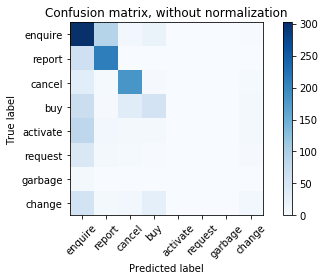

In [442]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(np.argmax(test_target_action_reduce,axis=1), np.argmax(pred_action, axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=data_df.action.unique(),
                      title='Confusion matrix, without normalization')


## #TODO 4: Build and evaluate a model for "object" classification



In [425]:
#TODO 4: Build and evaluate a model for "object" classification
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Input, GRU, Embedding, Dense, Conv1D, TimeDistributed, Flatten, Dropout, MaxPool1D
from keras.optimizers import Adam

def get_object_model():
    
    input1 = Input(shape=(longest_sentence,))
    x = Embedding(len(dictionary), 32, input_shape=(longest_sentence,))(input1)
    x = Conv1D(128, 5, activation="relu")(x)
    x = MaxPool1D()(x)
    x = Conv1D(128, 5, activation="relu")(x)
    x = MaxPool1D()(x)
    x = Conv1D(128, 5, activation="relu")(x)
    x = Flatten()(x)
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(100, activation='relu')(x)
    out = Dense(len(data_df.object.unique()), activation='sigmoid')(x)
    

    model = Model(inputs=input1, outputs=out)
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['acc'])
    
    return model

In [426]:
object_model = get_object_model();
object_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 129)               0         
_________________________________________________________________
embedding_23 (Embedding)     (None, 129, 32)           87232     
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 125, 128)          20608     
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 62, 128)           0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 58, 128)           82048     
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 29, 128)           0         
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 25, 128)           82048     
__________

In [427]:
from keras.callbacks import ModelCheckpoint

callbacks_list_object = [
        ModelCheckpoint(
            "/data/object.h5",
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=1
        )
  ]


print('start training')
verbose = 1
train_params = [(60, 1024)]
for (epochs, batch_size) in train_params:
  print("train with {} epochs and {} batch size".format(epochs, batch_size))
  object_model.fit(train_input, train_target_object, epochs=epochs, batch_size=batch_size, verbose=verbose,
                           callbacks=callbacks_list_object,
                           validation_data=(val_input, val_target_object))

start training
train with 60 epochs and 1024 batch size
Train on 8033 samples, validate on 2678 samples
Epoch 1/60
8033/8033 [==============================] - 3s 315us/step - loss: 0.5914 - acc: 0.7530 - val_loss: 0.2981 - val_acc: 0.8938

Epoch 00001: val_loss improved from inf to 0.29813, saving model to /data/object.h5
Epoch 2/60
8033/8033 [==============================] - 1s 83us/step - loss: 0.2406 - acc: 0.9356 - val_loss: 0.1543 - val_acc: 0.9615

Epoch 00002: val_loss improved from 0.29813 to 0.15433, saving model to /data/object.h5
Epoch 3/60
8033/8033 [==============================] - 1s 82us/step - loss: 0.1646 - acc: 0.9606 - val_loss: 0.1470 - val_acc: 0.9615

Epoch 00003: val_loss improved from 0.15433 to 0.14697, saving model to /data/object.h5
Epoch 4/60
8033/8033 [==============================] - 1s 82us/step - loss: 0.1533 - acc: 0.9615 - val_loss: 0.1429 - val_acc: 0.9615

Epoch 00004: val_loss improved from 0.14697 to 0.14286, saving model to /data/object.h5
Epo

In [428]:
pred_object = object_model.predict(test_input)
pred_object_index = np.argmax(pred_object, axis=1)
print(pred_object.shape)
for i in range(pred_object.shape[0]):
  index = pred_object_index[i]
  pred_object[i,:] = np.identity(len(data_df.object.unique()))[index]

(2678, 26)


In [429]:
evaluation_report(np.argmax(test_target_object,axis=1).tolist(), np.argmax(pred_object, axis=1).tolist())

,tag,precision,recall,f_score,correct_count
0,0,27.9221,31.3869,29.5533,43
1,1,57.4026,56.3776,56.8855,221
2,2,39.0476,59.854,47.2622,82
3,3,61.6667,59.2,60.4082,222
4,4,22.8261,36.5217,28.0936,42
5,5,61.1479,64.2691,62.6697,277
6,6,6.25,2.22222,3.27869,1
7,7,75.7463,72.242,73.9526,203
8,8,5.88235,1.69492,2.63158,1
9,9,39.0476,42.7083,40.796,41


Confusion matrix, without normalization


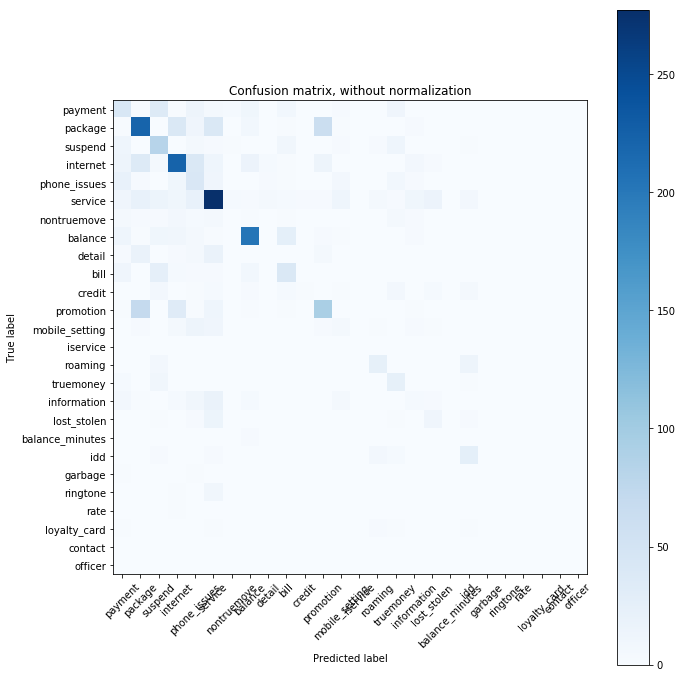

In [430]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(np.argmax(test_target_object,axis=1), np.argmax(pred_object, axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=data_df.object.unique(),
                      title='Confusion matrix, without normalization')


## #TODO 5: Build and evaluate a multi-task model that does both "action" and "object" classifications in one-go 

This can be a bit tricky, if you are not familiar with the Keras functional API. PLEASE READ this webpage(https://keras.io/getting-started/functional-api-guide/) before you start this task.   

Your model will have 2 separate output layers one for action classification task and another for object classification task. 

This is a rough sketch of what your model might look like:
![image](https://raw.githubusercontent.com/ekapolc/nlp_course/master/HW5/multitask_sketch.png)

In [480]:
#TODO 5: Build and evaluate a multi-task model that does both "action" and "object" classifications in one-go

def get_mix_model():
    
    input1 = Input(shape=(longest_sentence,))
    x = Embedding(len(dictionary), 32, input_shape=(longest_sentence,))(input1)
    x = Conv1D(128, 5, activation="relu")(x)
    x = MaxPool1D()(x)
    x = Conv1D(128, 5, activation="relu")(x)
    x = MaxPool1D()(x)
    x = Conv1D(128, 5, activation="relu")(x)
    flat = Flatten()(x)
    obj = Dense(128, activation='relu')(flat)
    obj = Dropout(0.5)(obj)
    obj = Dense(128, activation='relu')(obj)
    obj = Dropout(0.3)(obj)
    obj_out = Dense(len(data_df.object.unique()), activation='softmax')(obj)
    
    act = Dense(128, activation='relu')(flat)
    act = Dropout(0.3)(act)
    act = Dense(128, activation='relu')(act)
    act_out = Dense(len(data_df.action.unique()), activation='softmax')(act)
    

    model = Model(inputs=input1, outputs=[act_out, obj_out])
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['acc'])
    
    return model

mix_model = get_mix_model();
mix_model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           (None, 129)          0                                            
__________________________________________________________________________________________________
embedding_30 (Embedding)        (None, 129, 32)      87232       input_31[0][0]                   
__________________________________________________________________________________________________
conv1d_76 (Conv1D)              (None, 125, 128)     20608       embedding_30[0][0]               
__________________________________________________________________________________________________
max_pooling1d_50 (MaxPooling1D) (None, 62, 128)      0           conv1d_76[0][0]                  
__________________________________________________________________________________________________
conv1d_77 

In [479]:
train_target_mix = list()
val_target_mix = list()

for i in range(len(train_input)):
    train_target_mix.append(np.append(train_target_action[i], train_target_object[i]))

for i in range(len(val_input)):
    val_target_mix.append(np.append(val_target_action[i], val_target_object[i]))
                          
train_target_mix = np.array(train_target_mix)
val_target_mix = np.array(val_target_mix)

In [490]:
display([train_target_action, train_target_object])

[array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)]

In [493]:
from keras.callbacks import ModelCheckpoint

callbacks_list_mix = [
        ModelCheckpoint(
            "/data/mix.h5",
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=1
        )
  ]


print('start training')
verbose = 1
train_params = [(60, 1024)]
for (epochs, batch_size) in train_params:
  print("train with {} epochs and {} batch size".format(epochs, batch_size))
  mix_model.fit(train_input, [train_target_action,train_target_object], epochs=epochs, batch_size=batch_size, verbose=verbose,
                           callbacks=callbacks_list_mix,
                           validation_data=(val_input, [val_target_action,val_target_object]))

start training
train with 60 epochs and 1024 batch size
Train on 8033 samples, validate on 2678 samples
Epoch 1/60
8033/8033 [==============================] - 3s 428us/step - loss: 4.9294 - dense_100_loss: 1.7855 - dense_97_loss: 3.1439 - dense_100_acc: 0.5714 - dense_97_acc: 0.1107 - val_loss: 4.2500 - val_dense_100_loss: 1.4717 - val_dense_97_loss: 2.7783 - val_dense_100_acc: 0.6415 - val_dense_97_acc: 0.1591

Epoch 00001: val_loss improved from inf to 4.25000, saving model to /data/mix.h5
Epoch 2/60
8033/8033 [==============================] - 1s 89us/step - loss: 4.2608 - dense_100_loss: 1.3541 - dense_97_loss: 2.9067 - dense_100_acc: 0.6486 - dense_97_acc: 0.1341 - val_loss: 3.9794 - val_dense_100_loss: 1.2674 - val_dense_97_loss: 2.7120 - val_dense_100_acc: 0.6415 - val_dense_97_acc: 0.1359

Epoch 00002: val_loss improved from 4.25000 to 3.97943, saving model to /data/mix.h5
Epoch 3/60
8033/8033 [==============================] - 1s 88us/step - loss: 4.1125 - dense_100_loss: 1.2

In [496]:
pred_action, pred_object = mix_model.predict(test_input)

pred_action_index = np.argmax(pred_action, axis=1)
print(pred_action.shape)
for i in range(pred_action.shape[0]):
  index = pred_action_index[i]
  pred_action[i,:] = np.identity(len(data_df.action.unique()))[index]
    
pred_object_index = np.argmax(pred_object, axis=1)
print(pred_object.shape)
for i in range(pred_object.shape[0]):
  index = pred_object_index[i]
  pred_object[i,:] = np.identity(len(data_df.object.unique()))[index]

(2678, 8)
(2678, 26)


In [497]:
evaluation_report(np.argmax(test_target_action,axis=1).tolist(), np.argmax(pred_action, axis=1).tolist())
evaluation_report(np.argmax(test_target_object,axis=1).tolist(), np.argmax(pred_object, axis=1).tolist())

,tag,precision,recall,f_score,correct_count
0,0,81.8658,90.289,85.8714,1562
1,1,59.2965,43.2234,50,118
2,2,84.456,72.4444,77.9904,163
3,3,47.0149,37.9518,42,63
4,4,50,39.4495,44.1026,43
5,5,15.3846,13.3333,14.2857,8
6,6,-,0,-,0
7,7,49.0566,48.1481,48.5981,52
8,accuracy=75.02,,,,


,tag,precision,recall,f_score,correct_count
0,0,23.1707,41.6058,29.765,57
1,1,54.8533,61.9898,58.2036,243
2,2,53.1034,56.2044,54.6099,77
3,3,53.8462,69.0667,60.514,259
4,4,28.3951,20,23.4694,23
5,5,73.9946,64.0371,68.6567,276
6,6,7.14286,2.22222,3.38983,1
7,7,63.6103,79.0036,70.4762,222
8,8,5.88235,1.69492,2.63158,1
9,9,41.5254,51.0417,45.7944,49


Confusion matrix, without normalization
Confusion matrix, without normalization


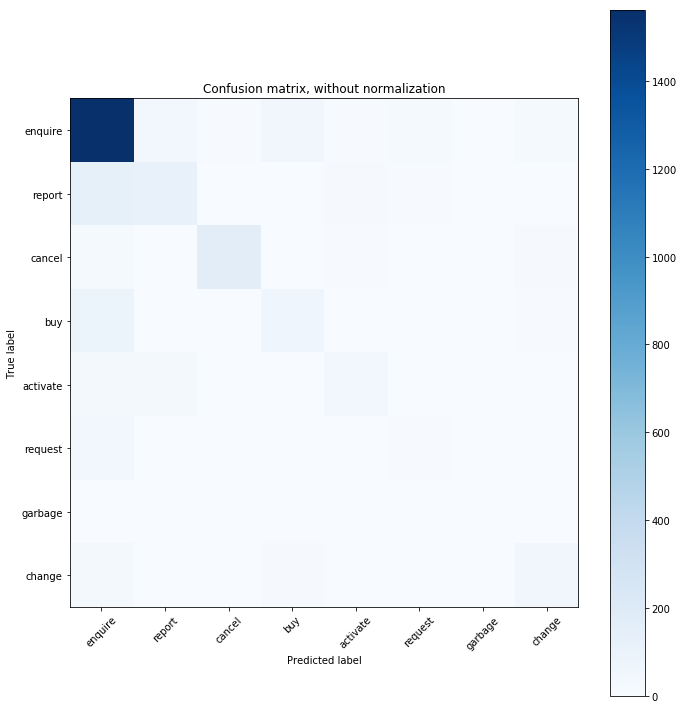

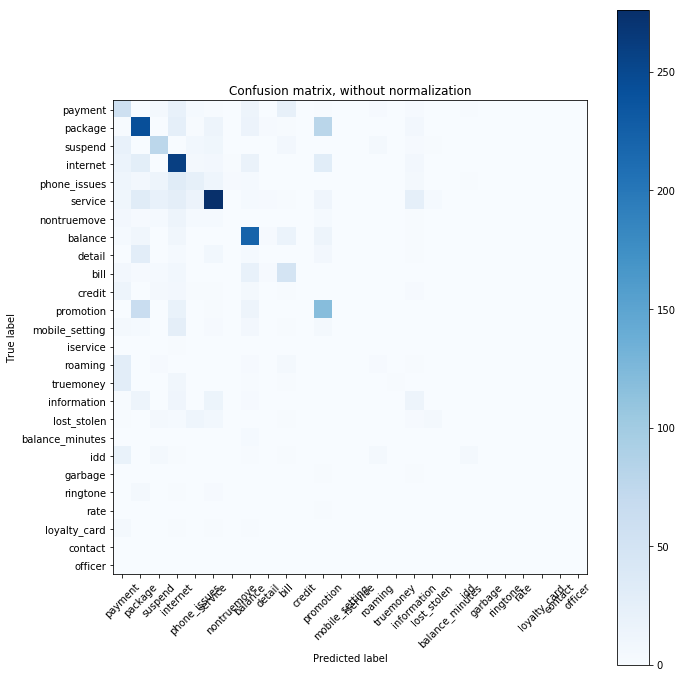

In [499]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(np.argmax(test_target_action,axis=1), np.argmax(pred_action, axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=data_df.action.unique(),
                      title='Confusion matrix, without normalization')


# Compute confusion matrix
cnf_matrix = confusion_matrix(np.argmax(test_target_object,axis=1), np.argmax(pred_object, axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=data_df.object.unique(),
                      title='Confusion matrix, without normalization')
